# Cat and Dog Classifer.

In [1]:
import tensorflow as tf


C:\Users\sarka\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib as mp
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from keras.preprocessing import image


Using TensorFlow backend.


### Initializing a CNN

In [5]:
classifier=Sequential()

### Convlution(32 feature detector of dimension 3 by 3), input shape 3 layer for color image)

In [6]:
classifier.add(Convolution2D(64,3,3,input_shape=(64,64,3),activation='relu'))
## Max Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

C:\Users\sarka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [7]:
## Add another layer
classifier.add(Convolution2D(64,3,3,input_shape=(64,64,3),activation='relu'))
## Max Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

C:\Users\sarka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  


In [8]:
# Flattening
classifier.add(Flatten())

In [9]:
## Fully connected ANN. Hidden ANN and Output layer
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=1,activation='sigmoid'))


C:\Users\sarka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\sarka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
## Compileing

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
## data importing and transforming and scaling

from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
##Scaling the Data
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
## Importing the training data
train_set=train_datagen.flow_from_directory('train',target_size=(64,64),batch_size=6,class_mode='binary')

Found 40 images belonging to 2 classes.


In [14]:
## Importing the training data
test_set=train_datagen.flow_from_directory('test',target_size=(64,64),batch_size=6,class_mode='binary')

Found 20 images belonging to 2 classes.


In [15]:
## fitting the model to images

classifier.fit_generator(
            train_set,
            steps_per_epoch=10,
            epochs=15,
            validation_data=test_set,
            validation_steps=38)

Epoch 1/15
10/10 [==============================] - 10s 1s/step - loss: 0.8296 - acc: 0.5243 - val_loss: 0.7000 - val_acc: 0.5052
Epoch 2/15
10/10 [==============================] - 5s 514ms/step - loss: 0.7017 - acc: 0.4924 - val_loss: 0.6874 - val_acc: 0.5638
Epoch 3/15
10/10 [==============================] - 5s 550ms/step - loss: 0.6905 - acc: 0.5000 - val_loss: 0.6802 - val_acc: 0.7292
Epoch 4/15
10/10 [==============================] - 6s 594ms/step - loss: 0.6709 - acc: 0.6079 - val_loss: 0.6718 - val_acc: 0.5904
Epoch 5/15
10/10 [==============================] - 5s 459ms/step - loss: 0.6639 - acc: 0.6082 - val_loss: 0.6587 - val_acc: 0.6406
Epoch 6/15
10/10 [==============================] - 5s 527ms/step - loss: 0.6183 - acc: 0.7265 - val_loss: 0.7579 - val_acc: 0.5053
Epoch 7/15
10/10 [==============================] - 5s 491ms/step - loss: 0.6625 - acc: 0.6845 - val_loss: 0.6661 - val_acc: 0.5417
Epoch 8/15
10/10 [==============================] - 5s 505ms/step - loss: 0.52

In [16]:
## Prediction of single new data

imagepath='103.jpg'
test_image=image.load_img(imagepath,target_size=(64,64))

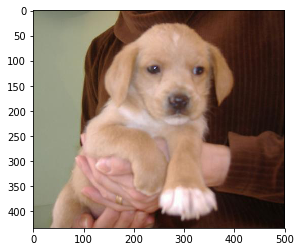

In [17]:
testimage=plt.imshow(mpimg.imread(imagepath))

In [18]:
#converting the image to an array

test_image=image.img_to_array(test_image)


In [19]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image=np.expand_dims(test_image,axis=0)

test_image.shape

(1, 64, 64, 3)

In [20]:
result=classifier.predict(test_image)
result.shape

(1, 1)

In [21]:
## Class of dog and cat
train_set.class_indices
if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

In [37]:
prediction

'cat'

# We will save the architecture of the model in json

In [38]:
json_string = classifier.to_json()

In [39]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_1", "trainable": true, "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "batch_input_shape

In [40]:
import json

def writeToJSONFile(path, fileName, data):
    filePathNameWExt = './' + path + '/' + fileName + '.json'
    with open(filePathNameWExt, 'w') as fp:
        json.dump(data, fp)

path='./'
fileName='pranab'

writeToJSONFile(path, fileName,json_string)

# Save the model weights

In [41]:
model.save_weights('pranab.h5')

# Loading the model achitecture

In [42]:
config = json.loads(open('pranab.json').read())

In [43]:
from keras.models import model_from_json
model = model_from_json(config)

# Load the weights

In [44]:
model.load_weights('pranab.h5')

# Convert to .pb file

In [45]:
np.random.seed(0)

wkdir = 'keras_to_tensorflow'
pb_filename = 'model.pb'

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

# save keras model as tf pb files ===============
from keras import backend as K
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, wkdir, pb_filename, as_text=False)


INFO:tensorflow:Froze 53 variables.
INFO:tensorflow:Converted 53 variables to const ops.


'keras_to_tensorflow\\model.pb'